In [1]:
import pandas as pd
import matplotlib.pylab as plt

from pathlib import Path

from datasets import load_dataset

/home/paul/.conda/envs/tf/lib/python3.10/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (None)/charset_normalizer (3.1.0) doesn't match a supported version!
  warnings.warn(


In [2]:
%matplotlib inline

In [3]:
root_dir = Path.cwd()
dataset = load_dataset("semeru/code-text-python", cache_dir=root_dir / "data" / "cache")

Found cached dataset json (/home/paul/projects/edu/master/mdl-ii/src/data/cache/semeru___json/semeru--code-text-python-047c4cae5928dad3/0.0.0/e347ab1c932092252e717ff3f949105a4dd28b27e842dd53157d2f72e276c2e4)


  0%|          | 0/3 [00:00<?, ?it/s]

In [4]:
dataset.set_format(type="pandas")
train_df = dataset["train"][:]
test_df = dataset["test"][:]
validation_df = dataset["validation"][:]

# Data Understanding

In [5]:
df = pd.concat([train_df, test_df, validation_df])

In [6]:
df.head()

,repo,path,func_name,original_string,language,code,code_tokens,docstring,docstring_tokens,sha,url,partition
0,smdabdoub/phylotoast,phylotoast/util.py,split_phylogeny,"def split_phylogeny(p, level=""s""):\n """"""\n ...",python,"def split_phylogeny(p, level=""s""):\n """"""\n ...","[def, split_phylogeny, (, p, ,, level, =, ""s"",...",Return either the full or truncated version of...,"[Return, either, the, full, or, truncated, ver...",0b74ef171e6a84761710548501dfac71285a58a3,https://github.com/smdabdoub/phylotoast/blob/0...,train
1,smdabdoub/phylotoast,phylotoast/util.py,ensure_dir,"def ensure_dir(d):\n """"""\n Check to make...",python,"def ensure_dir(d):\n """"""\n Check to make...","[def, ensure_dir, (, d, ), :, if, not, os, ., ...",Check to make sure the supplied directory path...,"[Check, to, make, sure, the, supplied, directo...",0b74ef171e6a84761710548501dfac71285a58a3,https://github.com/smdabdoub/phylotoast/blob/0...,train
2,smdabdoub/phylotoast,phylotoast/util.py,file_handle,"def file_handle(fnh, mode=""rU""):\n """"""\n ...",python,"def file_handle(fnh, mode=""rU""):\n """"""\n ...","[def, file_handle, (, fnh, ,, mode, =, ""rU"", )...",Takes either a file path or an open file handl...,"[Takes, either, a, file, path, or, an, open, f...",0b74ef171e6a84761710548501dfac71285a58a3,https://github.com/smdabdoub/phylotoast/blob/0...,train
3,smdabdoub/phylotoast,phylotoast/util.py,gather_categories,"def gather_categories(imap, header, categories...",python,"def gather_categories(imap, header, categories...","[def, gather_categories, (, imap, ,, header, ,...",Find the user specified categories in the map ...,"[Find, the, user, specified, categories, in, t...",0b74ef171e6a84761710548501dfac71285a58a3,https://github.com/smdabdoub/phylotoast/blob/0...,train
4,smdabdoub/phylotoast,phylotoast/util.py,parse_unifrac,"def parse_unifrac(unifracFN):\n """"""\n Pa...",python,"def parse_unifrac(unifracFN):\n """"""\n Pa...","[def, parse_unifrac, (, unifracFN, ), :, with,...",Parses the unifrac results file into a diction...,"[Parses, the, unifrac, results, file, into, a,...",0b74ef171e6a84761710548501dfac71285a58a3,https://github.com/smdabdoub/phylotoast/blob/0...,train


In [7]:
len(train_df), len(validation_df), len(test_df), len(df)

(251820, 13914, 14918, 280652)

In [8]:
df.isna().values.any()

False

Der Datensatz umfasst 280.652 Daten. Dieser ist in einen Trainingsdatensatz mit 251.820, einem Testdatensatz mit <br>
13.914 und einem Validationsdatensatz mit 14.918 Daten unterteil. Zudem weist der Datensatz keine Null-Werte auf <br>
was eine spätere Bereinigung unnötig macht.

## Features

> * **repo**: the owner/repo
> * **path**: the full path to the original file
> * **func_name**: the function or method name
> * **original_string**: the raw string before tokenization or parsing
> * **language**: the programming language
> * **code**: the part of the original_string that is code
> * **code_tokens**: tokenized version of code
> * **docstring**: the top-level comment or docstring, if it exists in the original string
> * **docstring_tokens**: tokenized version of docstring
> * **sha**: this field is not being used [TODO: add note on where this comes from?]
> * **partition**: a flag indicating what partition this datum belongs to of {train, valid, test, etc.} This is not used by the model. Instead we rely on directory structure to denote the partition of the data.
> * **url**: the url for the code snippet including the line numbers

Quelle: [CodeSearchNet](https://github.com/github/CodeSearchNet#evaluation)

Bei dem verwendeten Datensatz handelt es sich um den CodeSearchNet Datensatz, welcher die oben beschriebenen Features <br>
enthält. Hierbei wurden an dem Datensatz vom SEMERU Lab folgende Anpassungen vorgenommen:


> * Remove examples that codes cannot be parsed into an abstract syntax tree.
> * Remove examples that #tokens of documents is < 3 or >256
> * Remove examples that documents contain special tokens (e.g. <img ...> or https:...)
> * Remove examples that documents are not English.

Quelle: [SEMERU Lab](https://huggingface.co/datasets/semeru/code-text-python)

### Feature: repo

Hierbei handelt es sich um den Github Pfad zum Repository. Dieser besteht aus einem Benutzername und dem Namen des <br>
Repository getrennt durch einen Schrägstrich. Das Feature hat für die weitere Analyse keine Relevanz.

In [9]:
df["repo"][0].values[0]

'smdabdoub/phylotoast'

### Feature: path

Hierbei handelt es sich um den Pfad im Github Repository zur Datei in dem sich der Quelltext befindet. Das Feature <br>
hat für die weitere Analyse keine Relevanz.

In [10]:
df["path"][0].values[0]

'phylotoast/util.py'

### Feature: url 

Hierbei handelt es sich um die URL zum einem Quelltext in einem Github. Das Feature hat für die weitere Analyse keine <br>
Relevanz.


In [11]:
df["url"][0].values[0]

'https://github.com/smdabdoub/phylotoast/blob/0b74ef171e6a84761710548501dfac71285a58a3/phylotoast/util.py#L159-L177'

### Feature: sha

Hierbei handelt es sich um den Hash-Wert des Quellcodes. Das Feature hat für die weitere Analyse keine Relevanz.

In [12]:
df["sha"][0].values[0]

'0b74ef171e6a84761710548501dfac71285a58a3'

### Feature: language

Hierbei handelt es sich um die Programmiersprache, in der der Quellcode verfasst wurde. Dieses Feature weist immer den <br>
Wert Python auf. Das Feature hat für die weitere Analyse keine Relevanz.

In [13]:
df["language"][0].values[0]

'python'

In [14]:
df["language"].value_counts()

python    280652
Name: language, dtype: int64

### Feature: partition

Hierbei handelt es sich um die Einteilung in Train, Test und Validierungsdatensatz. Hierbei ist zu beachten das die <br>
Unterteilung schon im Basisdatensatz geschehen ist weswegen das das Feature für die weitere Analyse keine Relevanz hat.

In [15]:
df["partition"][0].values[0]

'train'

In [16]:
df["partition"].value_counts()

train    251820
test      14918
valid     13914
Name: partition, dtype: int64

### Feature: func_name

Hierbei handelt es sich um den Namen der Funktion. Das Feature hat für die weitere Analyse keine Relevanz.

In [17]:
df["func_name"][0].values[0]

'split_phylogeny'

### Feature: original_string

Hierbei handelt es sich um den Originalen nicht aufbereiteten Quellcode mit Kommentar. Da es ein Feature für jeweils <br>
den Code als auch den Kommentar gibt wird dieser Datensatz im Folgenden nicht weiter beachtet. 

In [18]:
df["original_string"][0].values[0]

'def split_phylogeny(p, level="s"):\n    """\n    Return either the full or truncated version of a QIIME-formatted taxonomy string.\n\n    :type p: str\n    :param p: A QIIME-formatted taxonomy string: k__Foo; p__Bar; ...\n\n    :type level: str\n    :param level: The different level of identification are kingdom (k), phylum (p),\n                  class (c),order (o), family (f), genus (g) and species (s). If level is\n                  not provided, the default level of identification is species.\n\n    :rtype: str\n    :return: A QIIME-formatted taxonomy string up to the classification given\n            by param level.\n    """\n    level = level+"__"\n    result = p.split(level)\n    return result[0]+level+result[1].split(";")[0]'

### Feature: code

Hierbei sollte es sich nach Beschreibung nur um den Quellcode ohne Kommentar handelt aber es existiert kein unterschied <br>
zum Feature **original_string**. Daraus resultiert das in der Data Preperation der Kommentar noch aus der Methode entfernt <br>
werden muss.

In [19]:
df["code"][0].values[0]

'def split_phylogeny(p, level="s"):\n    """\n    Return either the full or truncated version of a QIIME-formatted taxonomy string.\n\n    :type p: str\n    :param p: A QIIME-formatted taxonomy string: k__Foo; p__Bar; ...\n\n    :type level: str\n    :param level: The different level of identification are kingdom (k), phylum (p),\n                  class (c),order (o), family (f), genus (g) and species (s). If level is\n                  not provided, the default level of identification is species.\n\n    :rtype: str\n    :return: A QIIME-formatted taxonomy string up to the classification given\n            by param level.\n    """\n    level = level+"__"\n    result = p.split(level)\n    return result[0]+level+result[1].split(";")[0]'

In [20]:
(df["code"] == df["original_string"]).all()

True

### Feature: code_tokens

Hierbei handelt es sich um den in Tokens zerlegten Quellcode. Dieser umfasst nicht wie bei dem Feature code den Kommentar <br>
sodass hier keine weitere Aufbereitung nötig ist.

In [21]:
df["code_tokens"][0].values[0]

array(['def', 'split_phylogeny', '(', 'p', ',', 'level', '=', '"s"', ')',
       ':', 'level', '=', 'level', '+', '"__"', 'result', '=', 'p', '.',
       'split', '(', 'level', ')', 'return', 'result', '[', '0', ']', '+',
       'level', '+', 'result', '[', '1', ']', '.', 'split', '(', '";"',
       ')', '[', '0', ']'], dtype=object)

In [44]:
def draw_hist(df: pd.DataFrame, label: str, ticks: int = 10) -> None:
    data = df[label].str.len()
    fig, ax = plt.subplots(figsize=(20, 10))

    ax.hist(data, bins=range(min(data), max(data)))
    ax.set(
        title=f"Histogramm des Features {label}",
        xlabel="Anzahl der Tockens",
        ylabel="Anzahl im Bucket",
        xticks=range(0, max(data), ticks),
        xlim=(0, max(data) + 1)
    )   

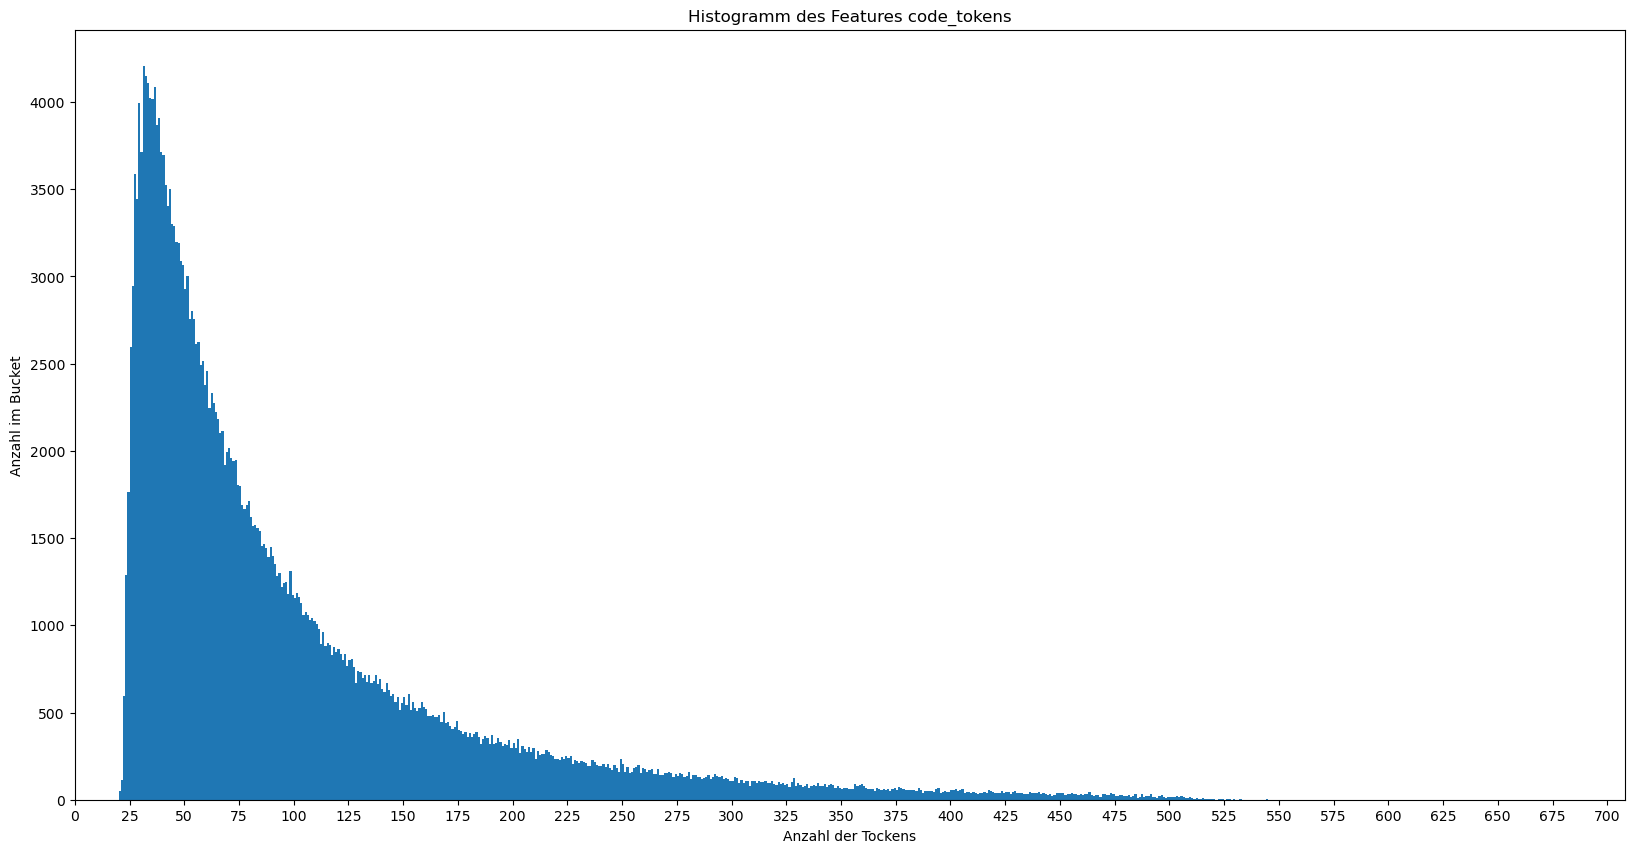

In [45]:
draw_hist(df, "code_tokens", 25)

### Feature: docstring

Hierbei handelt es sich um den Kommentar der Methode ohne jegliche Weiterverarbeitung.

In [23]:
df["docstring"][0].values[0]

'Return either the full or truncated version of a QIIME-formatted taxonomy string.\n\n    :type p: str\n    :param p: A QIIME-formatted taxonomy string: k__Foo; p__Bar; ...\n\n    :type level: str\n    :param level: The different level of identification are kingdom (k), phylum (p),\n                  class (c),order (o), family (f), genus (g) and species (s). If level is\n                  not provided, the default level of identification is species.\n\n    :rtype: str\n    :return: A QIIME-formatted taxonomy string up to the classification given\n            by param level.'

### Feature: docstring_tokens

Hierbei handelt es sich um den in Tokens zerlegten Kommentar. Zusätzlich wurden Spezielle tokens wie oben beschrieben <br>
aus dem Datensatz entfernt. Dieser benötigt keine weiter Aufbereitung und kann so weiterverwendet werden.

Wie beschrieben ist die Anzahl der Tokens auf eine Länge von 256 beschränkt

In [24]:
df["docstring_tokens"][0].values[0]

array(['Return', 'either', 'the', 'full', 'or', 'truncated', 'version',
       'of', 'a', 'QIIME', '-', 'formatted', 'taxonomy', 'string', '.'],
      dtype=object)

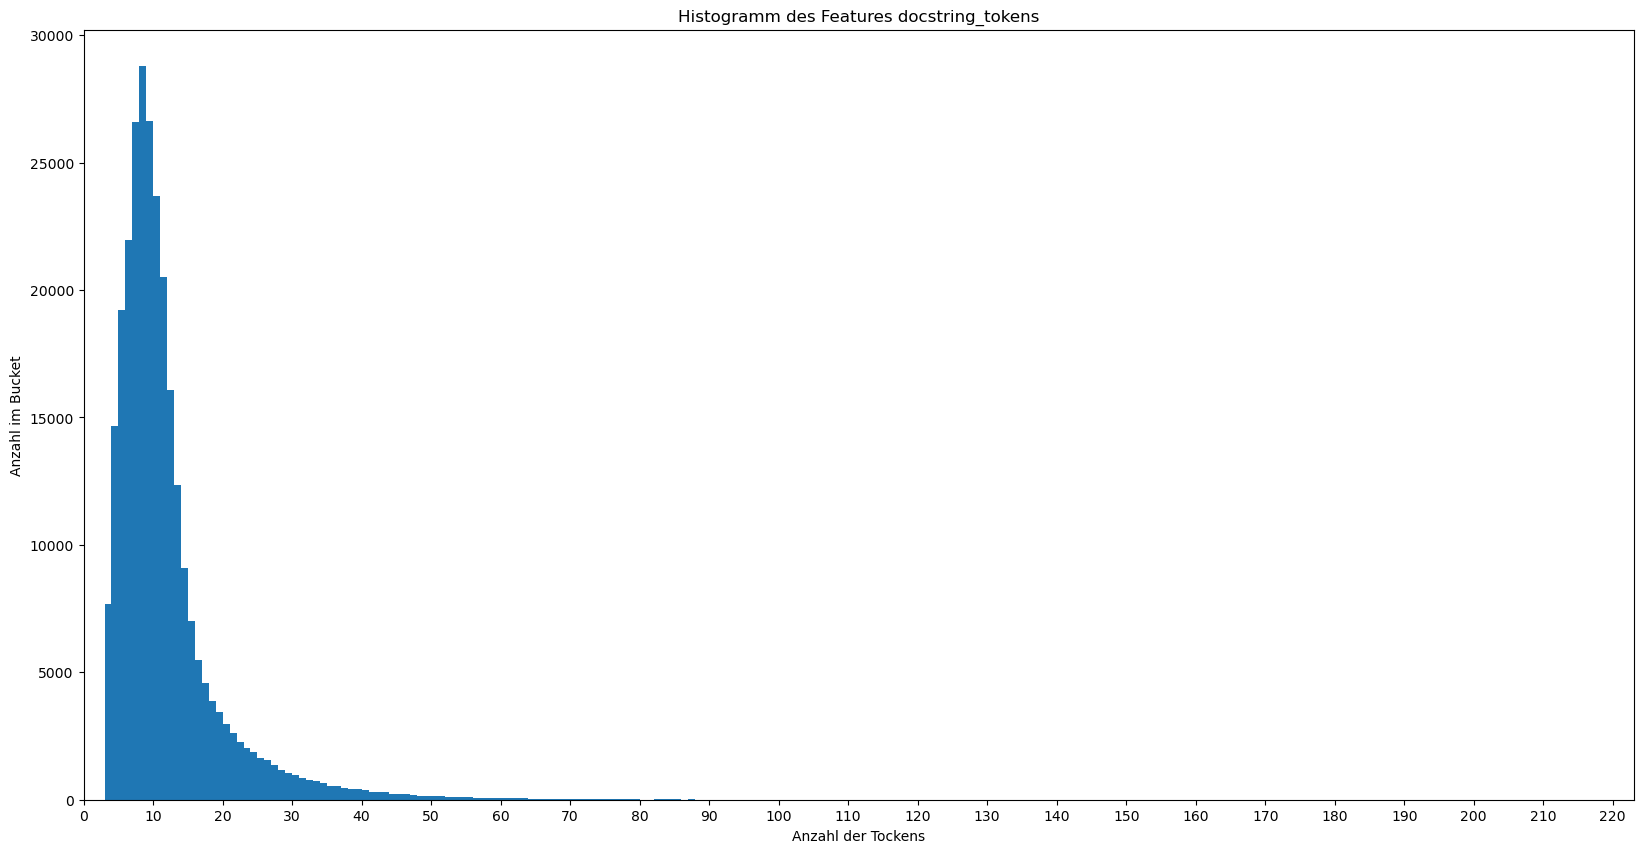

In [46]:
draw_hist(df, "docstring_tokens")